# **SENTIMENT ANALYSIS USING RESTAURANT REVIEWS DATA**
**NATURAL LANGUAGE PROCESSING**





#**STEP 1: IMPORTING BASIC LIBRARIES AND LOADING DATA**

In [ ]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#creating data frame by using pandas 

df=pd.read_table("/content/Restaurant_Reviews.tsv")

In [ ]:
# head() is use for viewing 5 first rows
df.head()     

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# it will gives me the shape of whole data.
df.shape    

(1000, 2)

In [ ]:
# it will gives the information about the data frame.just like number of columns, column labels, number of non-null entries, data type of the column, memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# It will gives all Statistical description.
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.columns   # it will gives me total column name of whole data.

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df['Liked'].nunique()  # nunique() method gives the number of unique values in the particular column.

2

In [ ]:
df['Liked'].value_counts()  #value_counts() method gives the number of times the particular value repeated in that column of DataFrame.

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.isnull().sum()    #it will gives me total null values count.

Review    0
Liked     0
dtype: int64

In [ ]:
df.groupby('Liked').describe()    #Count of value 'liked'

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [ ]:
#Calculating length of Review 
df['Length'] = df['Review'].apply(len)   
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


#**STEP 2 : DATA VISUALIZATIONS**

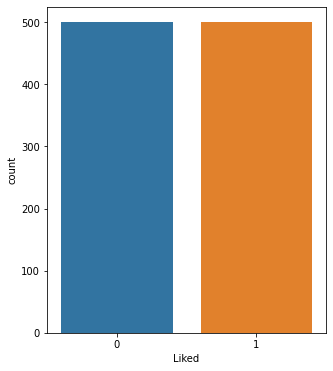

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(x=df.Liked)
plt.show()

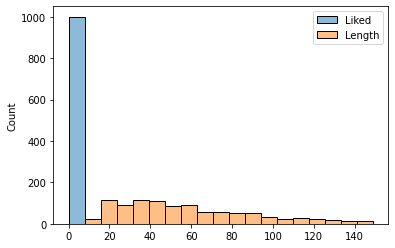

In [ ]:
sns.histplot(df)
plt.show()

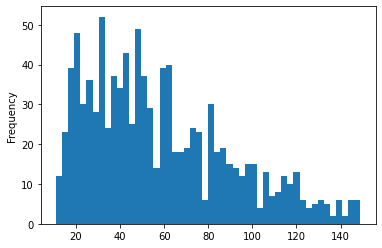

In [ ]:
# Inspeacing length of Review
df['Length'].plot(bins=50, kind='hist') 

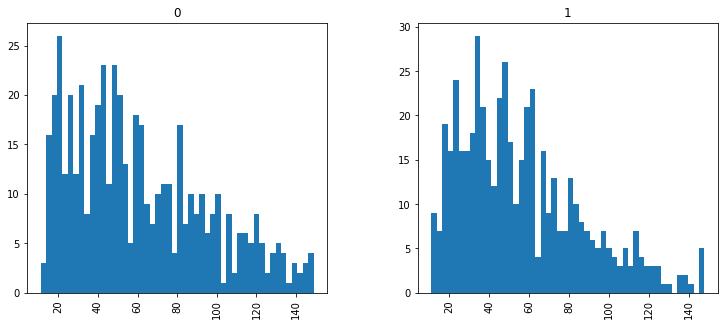

In [ ]:
# Comparing length of Review according to category
df.hist(column='Length', by='Liked', bins=50, figsize=(12,5))
plt.show()

In [ ]:
df.corr()

,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


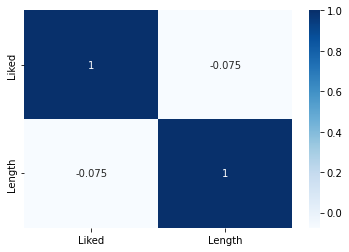

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

#**STEP 3 : NLP CLASSIFICATION**

In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_train.shape

(750,)

In [ ]:
y_test.shape

(250,)

**A - DIRECT METHOD : USING SVC AND COUNT VECTORIZER**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')

In [ ]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC 
model1 = SVC() 

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred1,y_test)                                     #creating confusion matrix for SVC  method
print(classification_report(y_pred1,y_test))                         #classification report for SVC method

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       163
           1       0.56      0.86      0.68        87

    accuracy                           0.72       250
   macro avg       0.73      0.75      0.72       250
weighted avg       0.78      0.72      0.73       250



**B - PIPELINE METHOD : USING SVC AND COUNT VECTORIZER**

In [ ]:
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred2,y_test)                                     #creating confusion matrix for SVC Pipeline method
print(classification_report(y_pred2,y_test))                         #classification report for SVC Pipeline method

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       127
           1       0.77      0.83      0.80       123

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



**C - DIRECT METHOD : USING NAIVE BAYES AND COUNT VECTORIZER**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB() 

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred3,y_test)                                     #creating confusion matrix for Naive bayes method
print(classification_report(y_pred3,y_test))                         #classification report for Naive bayes method

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       113
           1       0.77      0.75      0.76       137

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



**D - PIPELINE METHOD :USING NAIVE BAYES AND COUNT VECTORIZER**

In [ ]:
from sklearn.pipeline import make_pipeline 

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred4,y_test)                                     #creating confusion matrix for Naive bayes Pipeline method
print(classification_report(y_pred4,y_test))                         #classification report for Naive bayes Pipeline method

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       123
           1       0.77      0.81      0.79       127

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



#**STEP 4 : COMPARING ACCURACY**

In [ ]:
#  ACCURACY SCORES FOR ALL 4 MODELS
from sklearn.metrics import accuracy_score
print(f"Accuracy of SVC                  : {accuracy_score(y_pred1,y_test)}")
print(f"Accuracy of SVC PIPELINE         : {accuracy_score(y_pred2,y_test)}")
print(f"Accuracy of NAIVE BAYES          : {accuracy_score(y_pred3,y_test)}")
print(f"Accuracy of NAIVE BAYES PIPELINE : {accuracy_score(y_pred4,y_test)}")

Accuracy of SVC                  : 0.72
Accuracy of SVC PIPELINE         : 0.792
Accuracy of NAIVE BAYES          : 0.744
Accuracy of NAIVE BAYES PIPELINE : 0.784


In [ ]:
print(f"Here SVC Pipeline method have better accuracy, {accuracy_score(y_pred2,y_test):.2f}%")

Here SVC Pipeline method have better accuracy, 0.79%


#**STEP 5 : USING JOBLIB TO CREATING AND SAVING IT AS A MODEL**

In [ ]:
import joblib                      #Saving the Model 
joblib.dump(model2,'SVC_Pipeline')

['SVC_Pipeline']

In [ ]:
import joblib                      #Loading the Model
text_model=joblib.load('SVC_Pipeline')
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
text_model.predict(['Sooooo good!!'])  #Using the Model 

array([1])

In [ ]:
text_model.predict(["this was bad"])  #Using the Model

array([0])

#**STEP 6 : SENTIMENT ANALYSIS CONCLUSION**

Upon evaluating all the models we can conclude the following details.

1 - Accuracy : As far as the accuracy of the model is concerned SVC Pipeline performs better than other three method.

2 - F1-score: The F1 Scores for class 0 and class 1 are :

(a) For class 0: Naive Bayes(accuracy = 0.72) < SVC (accuracy =0.75) < Naive bayes Pipeline (accuracy = 0.77)< SVC Pipeline (accuracy = 0.79)

(b) For class 1: SVC (accuracy = 0.68) < Naive bayes(accuracy = 0.76) < Naive bayes Pipeline (accuracy = 0.79)< SVC Pipeline (accuracy = 0.80)


So the Conclusion is the SVC Pipeline is the best model for the above-given dataset.

#SENTIMENT ANALYSIS AND TWITTER SENTIMENTS

Sentiment analysis can be defined as a process that automates
mining of attitudes, opinions, views and emotions from text,
speech, tweets and database sources through Natural Language
Processing (NLP). Sentiment analysis involves classifying
opinions in text into categories like "positive" or "negative" or
"neutral". It's also referred as subjectivity analysis, opinion
mining, and appraisal extraction. 
Sentiment Analysis is used in marketing departments to monitor customer satisfaction with a service, product or brand when a large volume of feedback is obtained through social media such as Twitter Sentiment Analysis also is used for monitoring and analyzing social phenomena, for predicting situations and determining the general mood of the blogosphere.


